In [1]:
import numpy as np
import matplotlib.pyplot as plt

import beam_sim_utils as BS

import importlib  #this is just for devel!

import warnings
# warnings.filterwarnings("ignore")

In [2]:
importlib.reload(BS) #this is just for devel!

resolution = 512  # pixels in the FFT
res_EP_boost = 1  # resolution boost for PE implementation (res_EP = Lxy * res_EP_boost)
NA = 1
lamb =  0.532
Lxy = 12  # window half-size in lambdas in focal plane ROI
coord = BS.get_EP_coords(size=resolution, lamb=lamb, res_PE=Lxy*res_EP_boost)

for key in coord.keys():
    value = coord[key]
    if isinstance(value, np.ndarray):
        extra1 = f"min={value.min():.4f} max={value.max():.4f}"
        extra2 = f"shape={value.shape}  dtype={value.dtype}"
        extra = f"{extra1:<30}  {extra2}"
    else:
        extra = f"{value:0.4f}  {type(value)}"
    print(f"{key:<8}\t->\t{extra}")

x       	->	min=-21.3333 max=21.2500        shape=(512, 512)  dtype=float64
y       	->	min=-21.3333 max=21.2500        shape=(512, 512)  dtype=float64
r2      	->	min=0.0000 max=910.2222         shape=(512, 512)  dtype=float64
res_EP  	->	12.0000  <class 'numpy.int64'>
premask 	->	min=0.0000 max=1.0000           shape=(512, 512)  dtype=bool
theta   	->	min=0.0000 max=1.3485           shape=(512, 512)  dtype=float64
sinth   	->	min=0.0000 max=909.2222         shape=(512, 512)  dtype=float64
costh   	->	min=0.0000 max=1.0000           shape=(512, 512)  dtype=float64
sqcosth 	->	min=-909.2222 max=1.0000        shape=(512, 512)  dtype=float64
phi     	->	min=-3.1377 max=3.1416          shape=(512, 512)  dtype=float64
sinphi  	->	min=-1.0000 max=1.0000          shape=(512, 512)  dtype=float64
cosphi  	->	min=-1.0000 max=1.0000          shape=(512, 512)  dtype=float64


True

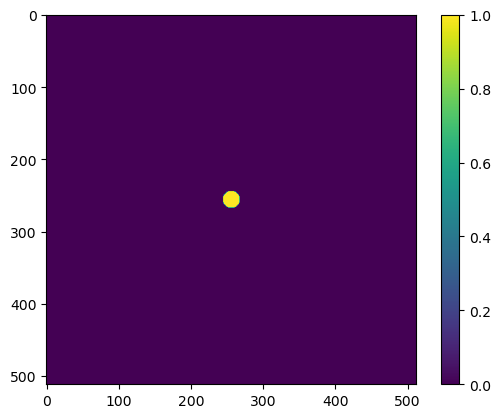

In [3]:
plt.imshow(coord['premask'])
plt.colorbar()

(coord['sqcosth'] == np.zeros_like(coord['sqcosth'])).any()

In [4]:
def my_beam():
    """ This function must return a 2D array of complex numbers with 2 channels (Ex, Ey),
        :return beam -> beam.shape=(size,size,2) beam.dtype=complex128
    """
    beam = np.zeros((resolution, resolution, 2), dtype=np.complex128)

    fill_fact = 1
    waist = coord['res_EP']

    profile = np.exp(-fill_fact**2 * coord['r2'] / waist**2)
    phase = np.zeros_like(beam[:,:,0], dtype=np.float64)
    ramp = np.repeat(np.linspace(0, np.pi, resolution//2), resolution)
    phase[:,resolution//2:] = ramp.reshape(resolution, resolution//2)
    phase[:,:resolution//2] = ramp.reshape(resolution, resolution//2)[::-1,:] + np.pi

    beam[:,:,0] = profile * np.exp(1j*phase) * coord['premask']
    beam[:,:,1] = profile * np.exp(1j*(phase+np.pi/2)) * coord['premask']

    return beam

/Users/malu/OneDrive - Universitat de Barcelona/Research/pyHolo/beam_simulation/beam_sim_utils.py:141: RuntimeWarning: invalid value encountered in true_divide
  ax[3].imshow(np.angle(Ey/Ex), vmin=-np.pi, vmax=np.pi, cmap=cmap_ph)


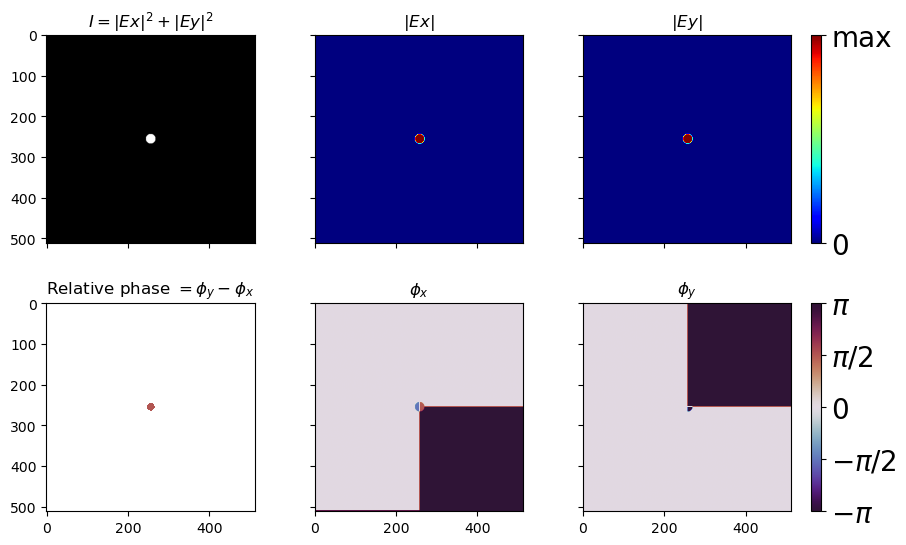

Figure 1: (My beam Pol.) The raw data of the retrieved transversal component.


1

In [5]:
importlib.reload(BS) #this is just for devel!


entrance_beam = my_beam()

BS.plot_entrance_beam(entrance_beam, label="My beam")

In [6]:
np.pi/2

1.5707963267948966

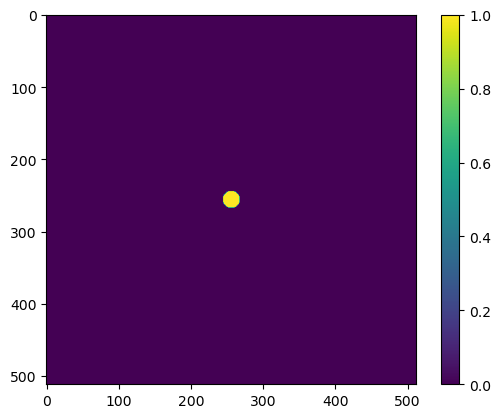

(256, 256)


<Figure size 640x480 with 0 Axes>

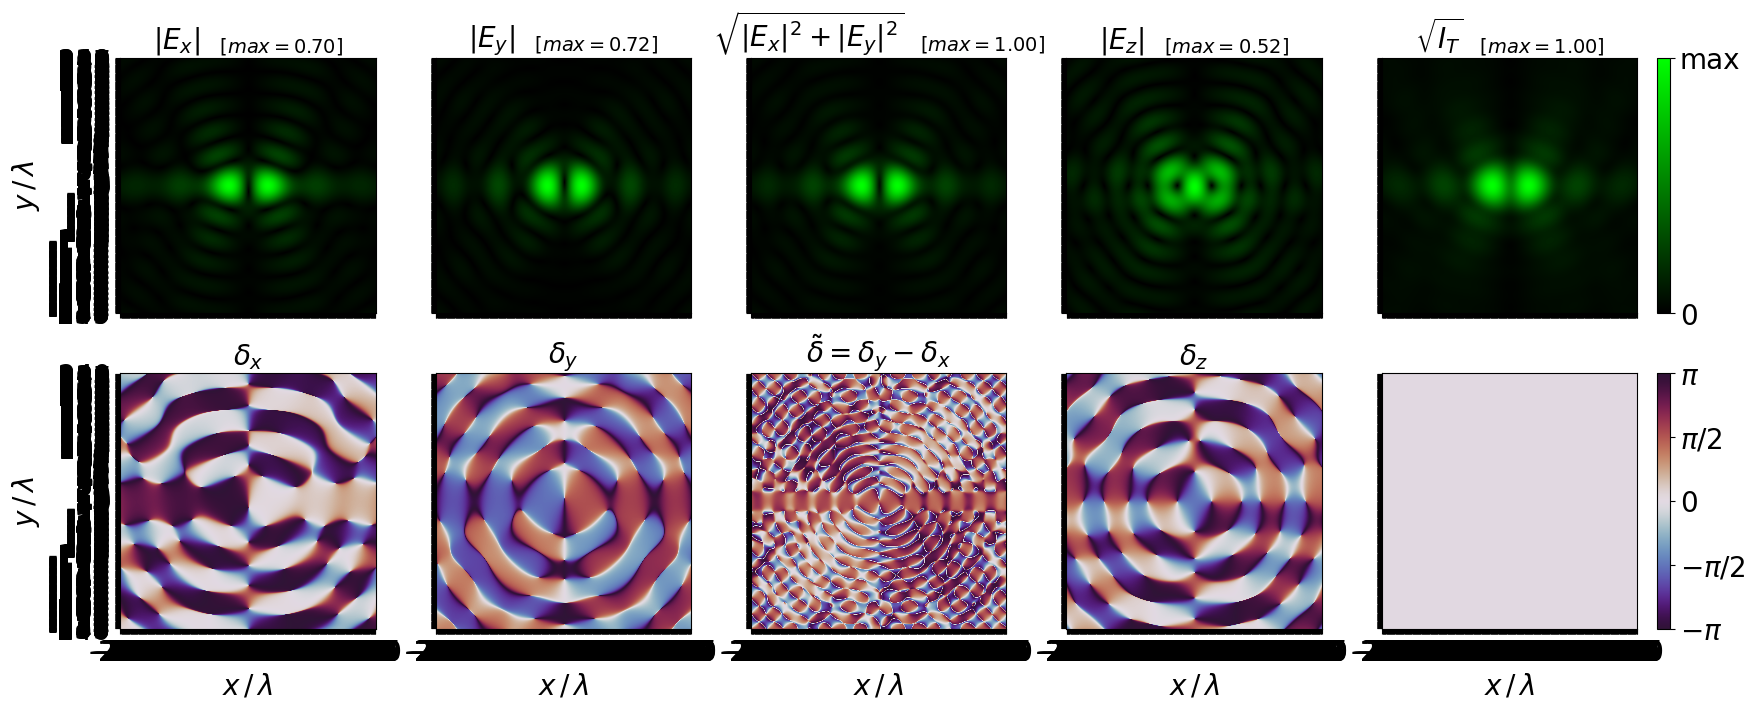

Figure 1: (My beam) Field in the focal plane.


1

In [10]:
importlib.reload(BS) #this is just for devel!

size_ratio = .5

focused_beam = BS.richards_wolf(entrance_beam, coord, NA=0.6, lamb=lamb, refractive_index=1)

trim = int(res_EP_boost / 4)

print(focused_beam[trim:-trim,trim:-trim,0].shape)

BS.plot_focused_field(focused_beam, label="My beam", lamb=lamb, trim=trim)